In [1]:
import tensorflow as tf

In [2]:
df= tf.keras.datasets.mnist

In [3]:
(X_train,y_train),(X_test,y_test)=df.load_data()
X_train,X_test= X_train/255.0, X_test/255.0

In [4]:
X_train.shape

(60000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def plot_sample(X, y, index):
    plt.figure()
    plt.imshow(X[index])
    #plt.xlabel(classes[y[index]])

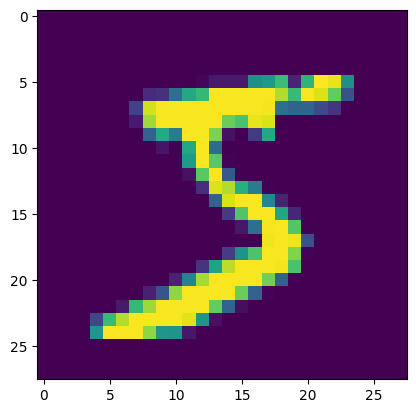

In [7]:
plot_sample(X_train,y_train,0)

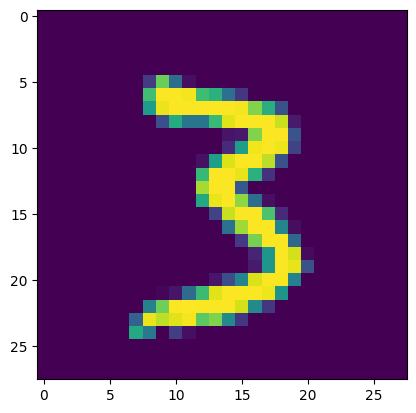

In [24]:
plot_sample(X_train,y_train,130)

In [8]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)        
    ])

C:\Users\Aniket kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
pred= ann(X_train[:1]).numpy()
pred

array([[ 0.63351095,  0.04115938, -0.10398235,  0.16039313,  0.5978045 ,
         0.45128673,  0.10219288, -0.10603849,  0.06355049, -0.59560555]],
      dtype=float32)

In [10]:
tf.nn.softmax(pred).numpy() #after softmax , we can see all values are positive

array([[0.15683843, 0.08673561, 0.07501762, 0.09771923, 0.15133709,
        0.1307114 , 0.09219427, 0.07486352, 0.08869962, 0.04588323]],
      dtype=float32)

In [11]:
loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [12]:
loss(y_train[:1],pred).numpy()

2.0347633

In [13]:
ann.compile(optimizer='adam',
               loss=loss,
               metrics=['accuracy'])

In [14]:
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8583 - loss: 0.4819
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9555 - loss: 0.1501
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9670 - loss: 0.1120
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9720 - loss: 0.0908
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9773 - loss: 0.0740


In [35]:
ann.evaluate(X_test,y_test, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.9752 - loss: 0.0791


[0.07906228303909302, 0.9751999974250793]

In [ ]:
#CNN - Convolutional Neural Network

Convolutional layer- converts image into array
Relu layer- Regularization used to convert negative numbers to zero
Pooling layer- used for reduction of the input image size with filters (2x2 common filter), can control overfitting
fully connected layers- combines features and produces a model

#image classification

In [51]:
import matplotlib.pyplot as plt
import matplotlib.image as npimg
import cv2
import os

In [17]:
os.getcwd()

'C:\\Users\\Aniket kumar\\Desktop\\Dl\\cnn'

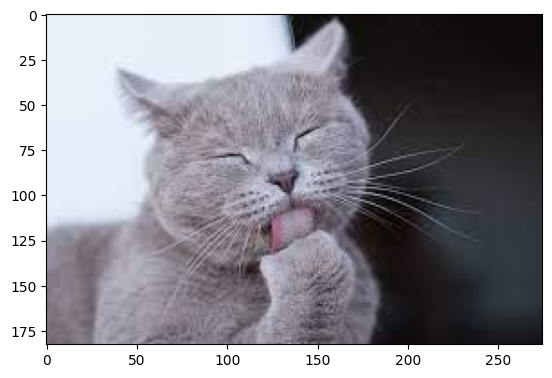

In [20]:
imgnp= npimg.imread("C:\\Users\\Aniket kumar\\Desktop\\Dl\\cnn\\train\\cats\\cat_100.jpg")
imgplot=plt.imshow(imgnp)
plt.show()

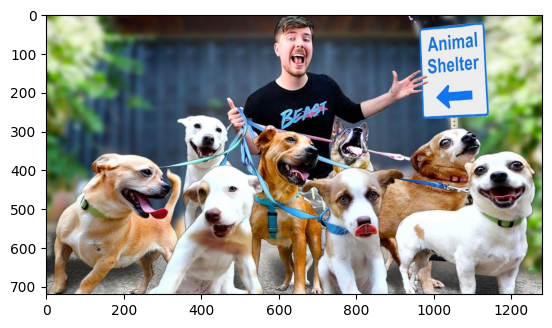

In [21]:
imgnp= npimg.imread("C:\\Users\\Aniket kumar\\Desktop\\Dl\\cnn\\train\\dogs\\dog_106.jpg")
imgplot=plt.imshow(imgnp)
plt.show()

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation

In [24]:
print(tf.__version__)

2.16.1


In [25]:
#initalize parameters
img_width, img_height= 150,150
train_Data= r"C:\\Users\\Aniket kumar\\Desktop\\Dl\\cnn\\train"
test_Data= r"C:\\Users\\Aniket kumar\\Desktop\\Dl\\cnn\\test"
nb_train_sample= 100
nb_validation_samples=100
epochs=20
batch_size=20

In [26]:
#checking shapes of image    150x150X3
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3,img_width,img_height)
else:
    input_shape=(img_width,img_height,3)

In [ ]:
#spilitting data

In [27]:
train_data= ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_data= ImageDataGenerator(rescale=1. / 255)

In [ ]:
#train model

In [29]:
train_gen= train_data.flow_from_directory(train_Data, target_size=(img_width,img_height), batch_size=batch_size,class_mode="binary",classes=["cats","dogs"])

Found 557 images belonging to 2 classes.


In [30]:
validation_s= test_data.flow_from_directory(test_Data,target_size=(img_width,img_height), batch_size=batch_size,class_mode="binary")

Found 140 images belonging to 2 classes.


In [ ]:
#representation of image data generator

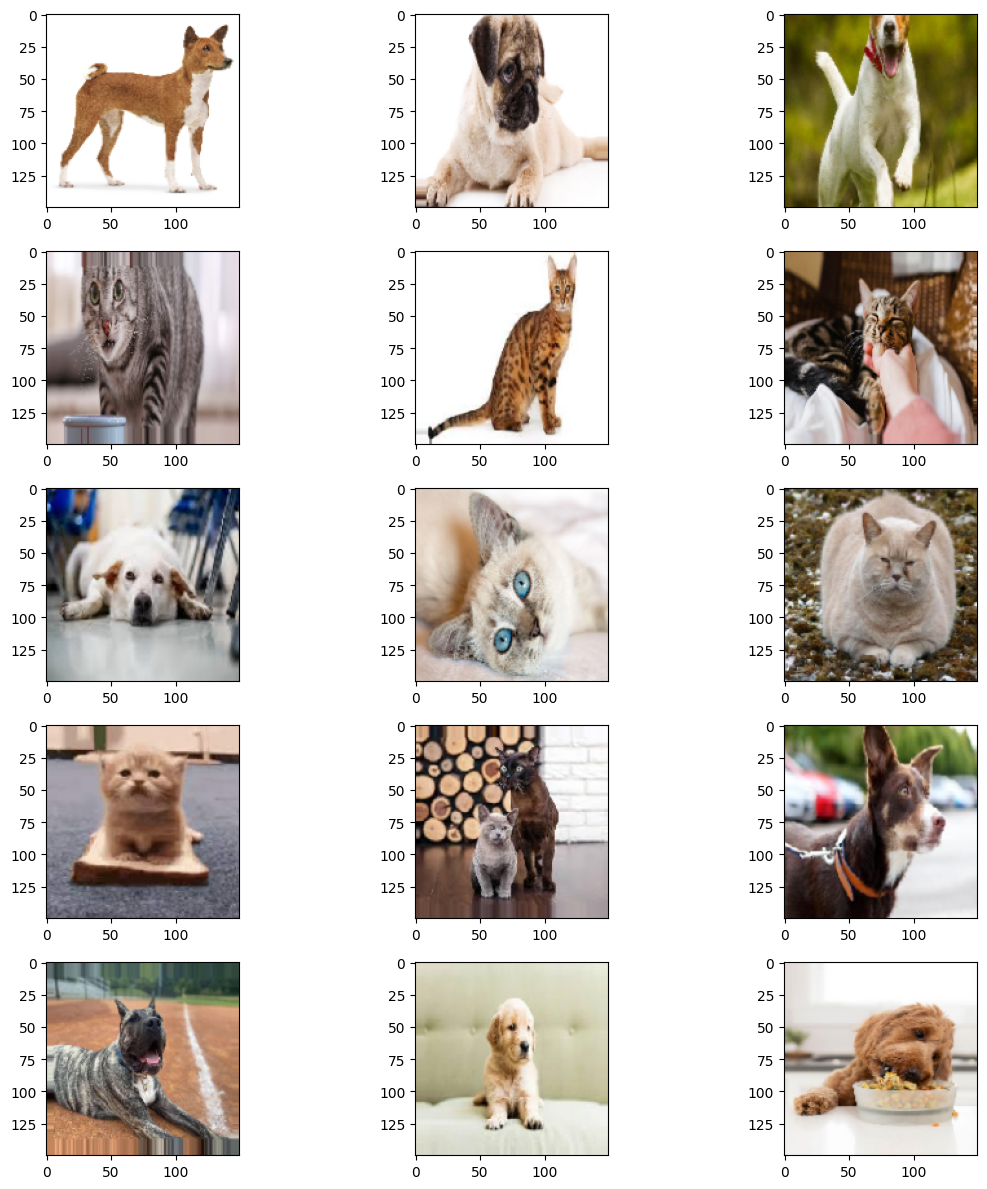

In [31]:
plt.figure(figsize=(12,12)) #15 images for training
for i in range(0,15):
    plt.subplot(5,3,i+1)
    for X_bacth, y_batch in train_gen:
        image= X_bacth[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()


In [32]:
#CNN model

In [34]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape)) #64 nuerons using 3x3 filter

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) #pooling reduces the size of the data

model.add(Flatten()) #conversion of multi-dimensional array into 1d array
model.add(Dense(64))

model.add(Activation('relu'))
model.add(Dense(1)) #output layer
model.add(Activation('sigmoid'))
model.summary()


C:\Users\Aniket kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 148, 148, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 350464)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      22,429,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,431,617 (85.57 MB)

 Trainable params: 22,431,617 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 148, 148, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 350464)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      22,429,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,431,617 (85.57 MB)

 Trainable params: 22,431,617 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
#model fitting

In [45]:
steps_per_epoch = len(train_gen)//batch_size
validation_steps = len(validation_s)//batch_size

In [46]:
training= model.fit(train_gen,steps_per_epoch=steps_per_epoch,epochs=epochs,validation_data=validation_s,validation_steps=validation_steps) 

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.4500 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4000 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3500 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7000 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6000 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7000 - loss: 0.6925 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5500 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6000 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 9/20
1/1 ━

<h3>model accuracy</h3>

In [40]:
print(training.history.keys()) #all training data's

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


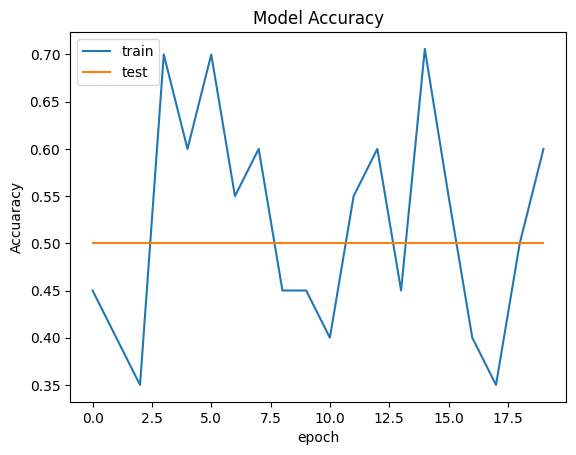

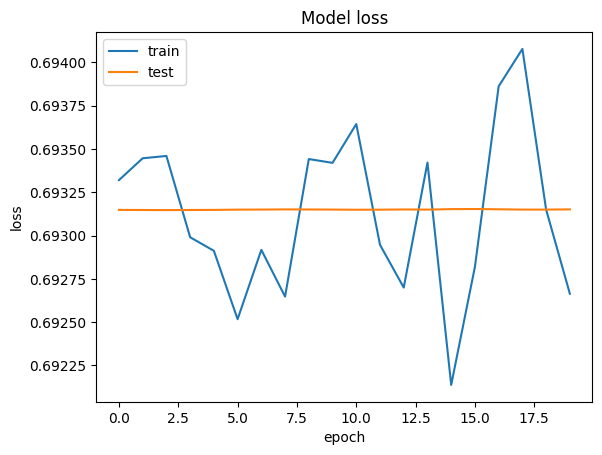

In [49]:
plt.plot(training.history["accuracy"])
plt.plot(training.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuaracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

plt.plot(training.history["loss"])
plt.plot(training.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

<h2>Image Prediction</h2>

In [48]:
import numpy as np
from tensorflow.keras.preprocessing import image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[[0.49855924]]
Prediction:  CAT


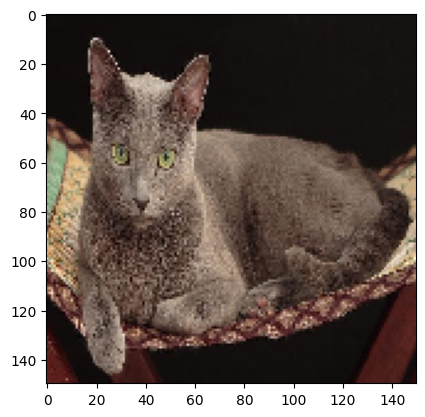

In [60]:
pred_img= image.load_img("C:\\Users\\Aniket kumar\\Desktop\\Dl\\cnn\\test\\cats\\cat_147.jpg",target_size=(150,150))

pred= image.img_to_array(pred_img)
pred=np.expand_dims(pred,axis=0)

res= model.predict(pred)
print(res)
if res[0][0]==1:
    prediction="DOG"
else:
    prediction="CAT"
print("Prediction: ",prediction)
imgplot= plt.imshow(pred_img)
plt.show()


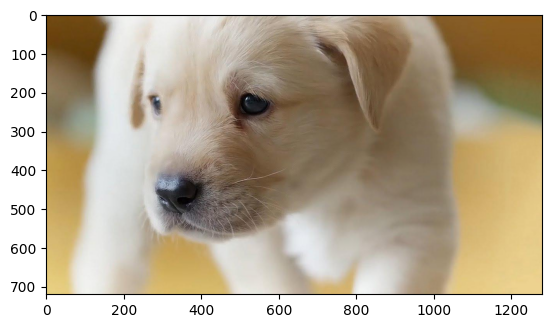

In [62]:
img = npimg.imread("C:\\Users\\Aniket kumar\\Desktop\\Dl\\cnn\\test\\dogs\\dog_173.jpg")
imgplot= plt.imshow(img)
plt.show()

In [67]:
print(res[0][0])

0.49855924
